# Earth Observations with Julia

- 14-19 April 2024
- EGU24, Vienna Austria

> Lazaro Alonso  
<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" width=20/> https://github.com/lazarusA 
> - <font color = teal> **Max Planck Institute for Biogeochemistry** </font>
> - Model-Data Integration Group 
- lalonso@bgc-jena.mpg.de



![t2m_extremes](./figures/t2m_despair_w.png)

### Some useful links:

- https://juliadatacubes.github.io/YAXArrays.jl/dev/
- https://docs.makie.org/stable/
- https://rafaqz.github.io/DimensionalData.jl/dev/

In [1]:
pwd()

"/Users/lalonso/Desktop/Julia-intro-for-geoscience-EGU2024/notebooks"

In [5]:
# using Pkg; Pkg.activate("../")

  Activating project at `~/Desktop/Julia-intro-for-geoscience-EGU2024`


In [7]:
# Pkg.add(["YAXArrays", "NetCDF", "Zarr", "Dates", "CairoMakie", "DimensionalData", "Downloads"])

In [4]:
# Pkg.status()

## Loading data

### NetCDF

In [8]:
using YAXArrays, NetCDF, Downloads

In [9]:
url = "https://www.unidata.ucar.edu/software/netcdf/examples/tos_O1_2001-2002.nc"
filename = Downloads.download(url, "tos_O1_2001-2002.nc"); # you pick your own path

In [10]:
c_small = Cube(filename)

╭────────────────────────────────────────────────╮
│ 180×170×24 YAXArray{Union{Missing, Float32},3} │
├────────────────────────────────────────────────┴─────────────────────── dims ┐
  ↓ lon Sampled{Float64} 1.0:2.0:359.0 ForwardOrdered Regular Points,
  → lat Sampled{Float64} -79.5:1.0:89.5 ForwardOrdered Regular Points,
  ↗ Ti  Sampled{CFTime.DateTime360Day} [CFTime.DateTime360Day(2001-01-16T00:00:00), …, CFTime.DateTime360Day(2002-12-16T00:00:00)] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"          => "K"
  "missing_value"  => 1.0f20
  "history"        => " At   16:37:23 on 01/11/2005: CMOR altered the data in t…
  "cell_methods"   => "time: mean (interval: 30 minutes)"
  "name"           => "tos"
  "long_name"      => "Sea Surface Temperature"
  "original_units" => "degC"
  "standard_name"  => "sea_surface_temperature"
  "_FillValue"     => 1.0f20
  "original_name"  

### Zarr

In [11]:
using Zarr, YAXArrays
store ="gs://cmip6/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1-2-HR/ssp585/r1i1p1f1/3hr/tas/gn/v20190710/"

"gs://cmip6/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1-2-HR/ssp585/r1i1p1f1/3hr/tas/gn/v20190710/"

In [12]:
g = open_dataset(zopen(store, consolidated=true))

YAXArray Dataset
Shared Axes: 
()
Variables: 
height, 
tas
  ↓ lon Sampled{Float64} 0.0:0.9375:359.0625 ForwardOrdered Regular Points,
  → lat Sampled{Float64} [-89.28422753251364, -88.35700351866494, …, 88.35700351866494, 89.28422753251364] ForwardOrdered Irregular Points,
  ↗ Ti  Sampled{DateTime} [2015-01-01T03:00:00, …, 2101-01-01T00:00:00] ForwardOrdered Irregular Points
Properties: Dict{String, Any}("initialization_index" => 1, "realm" => "atmos", "variable_id" => "tas", "external_variables" => "areacella", "branch_time_in_child" => 60265.0, "data_specs_version" => "01.00.30", "history" => "2019-07-21T06:26:13Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.", "forcing_index" => 1, "parent_variant_label" => "r1i1p1f1", "table_id" => "3hr"…)


In [13]:
# select the variable
c_big = g["tas"]

╭────────────────────────────────────╮
│ 384×192×251288 YAXArray{Float32,3} │
├────────────────────────────────────┴─────────────────────────────────── dims ┐
  ↓ lon Sampled{Float64} 0.0:0.9375:359.0625 ForwardOrdered Regular Points,
  → lat Sampled{Float64} [-89.28422753251364, -88.35700351866494, …, 88.35700351866494, 89.28422753251364] ForwardOrdered Irregular Points,
  ↗ Ti  Sampled{DateTime} [2015-01-01T03:00:00, …, 2101-01-01T00:00:00] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"         => "K"
  "history"       => "2019-07-21T06:26:13Z altered by CMOR: Treated scalar dime…
  "name"          => "tas"
  "cell_methods"  => "area: mean time: point"
  "cell_measures" => "area: areacella"
  "long_name"     => "Near-Surface Air Temperature"
  "coordinates"   => "height"
  "standard_name" => "air_temperature"
  "_FillValue"    => 1.0f20
  "comment"       => "near-surface (

## Basic plots ans statistics

In [14]:
using CairoMakie
CairoMakie.activate!()

In [15]:
c_small

╭────────────────────────────────────────────────╮
│ 180×170×24 YAXArray{Union{Missing, Float32},3} │
├────────────────────────────────────────────────┴─────────────────────── dims ┐
  ↓ lon Sampled{Float64} 1.0:2.0:359.0 ForwardOrdered Regular Points,
  → lat Sampled{Float64} -79.5:1.0:89.5 ForwardOrdered Regular Points,
  ↗ Ti  Sampled{CFTime.DateTime360Day} [CFTime.DateTime360Day(2001-01-16T00:00:00), …, CFTime.DateTime360Day(2002-12-16T00:00:00)] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"          => "K"
  "missing_value"  => 1.0f20
  "history"        => " At   16:37:23 on 01/11/2005: CMOR altered the data in t…
  "cell_methods"   => "time: mean (interval: 30 minutes)"
  "name"           => "tos"
  "long_name"      => "Sea Surface Temperature"
  "original_units" => "degC"
  "standard_name"  => "sea_surface_temperature"
  "_FillValue"     => 1.0f20
  "original_name"  

In [16]:
c_slice = c_small[Ti = 1]

╭─────────────────────────────────────────────╮
│ 180×170 YAXArray{Union{Missing, Float32},2} │
├─────────────────────────────────────────────┴───────────────── dims ┐
  ↓ lon Sampled{Float64} 1.0:2.0:359.0 ForwardOrdered Regular Points,
  → lat Sampled{Float64} -79.5:1.0:89.5 ForwardOrdered Regular Points
├─────────────────────────────────────────────────────────────────────┴ metadata ┐
  Dict{String, Any} with 10 entries:
  "units"          => "K"
  "missing_value"  => 1.0f20
  "history"        => " At   16:37:23 on 01/11/2005: CMOR altered the data in t…
  "cell_methods"   => "time: mean (interval: 30 minutes)"
  "name"           => "tos"
  "long_name"      => "Sea Surface Temperature"
  "original_units" => "degC"
  "standard_name"  => "sea_surface_temperature"
  "_FillValue"     => 1.0f20
  "original_name"  => "sosstsst"
├───────────────────────────────────────────────────────────────────── file size ┤ 
  file size: 119.53 KB
└───────────────────────────────────────────────────────

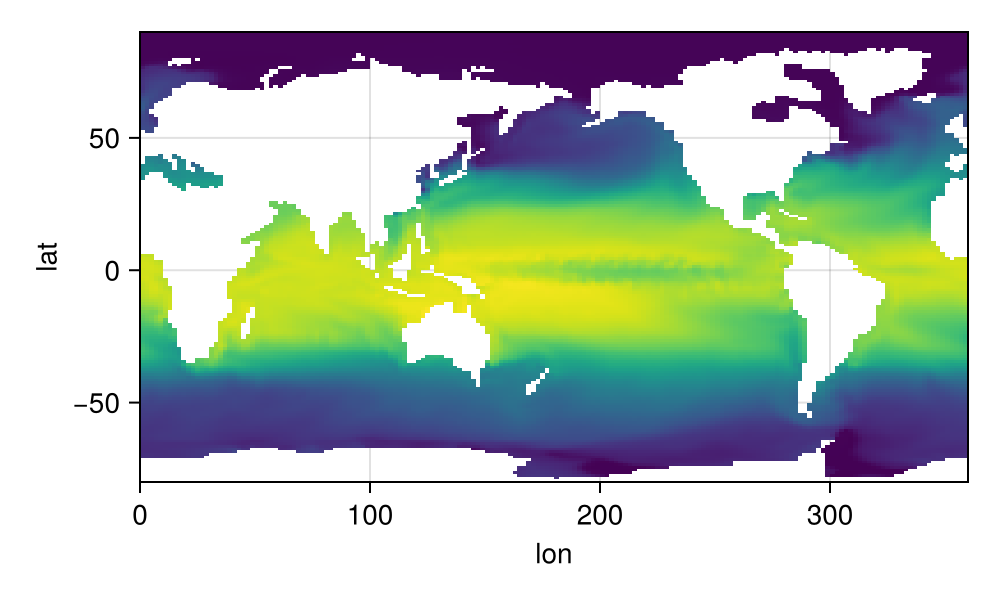

In [18]:
heatmap(c_slice; figure= (;size = (500,300)))

In [19]:
using Statistics

In [20]:
c_mean = mapslices(mean, c_small, dims="Ti")

╭─────────────────────────────────────────────╮
│ 180×170 YAXArray{Union{Missing, Float32},2} │
├─────────────────────────────────────────────┴───────────────── dims ┐
  ↓ lon Sampled{Float64} 1.0:2.0:359.0 ForwardOrdered Regular Points,
  → lat Sampled{Float64} -79.5:1.0:89.5 ForwardOrdered Regular Points
├─────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any}()
├────────────────────────────────────────────────────────── file size ┤ 
  file size: 119.53 KB
└─────────────────────────────────────────────────────────────────────┘

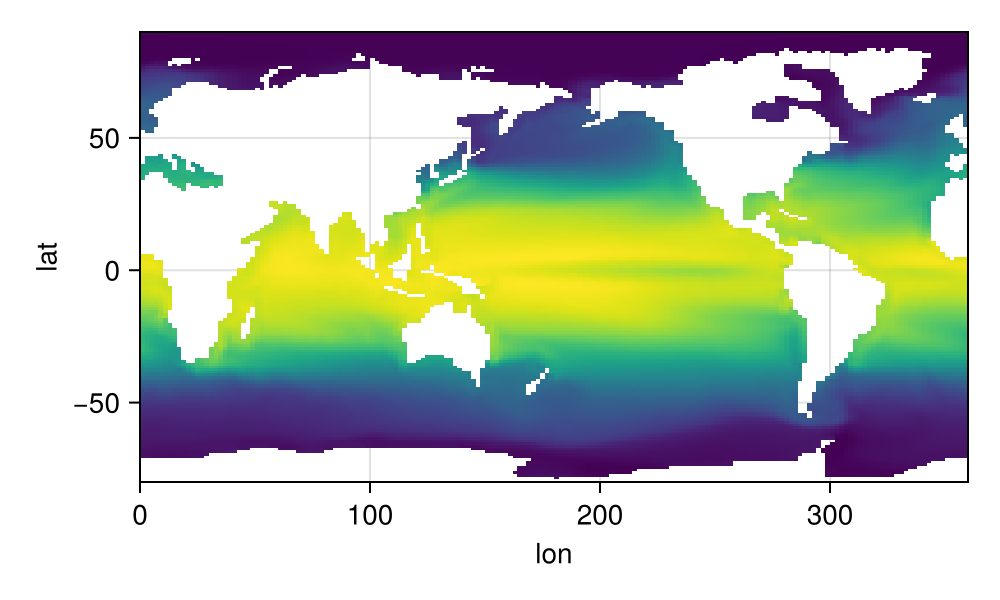

In [39]:
heatmap(c_mean; figure= (;size = (500,300)))

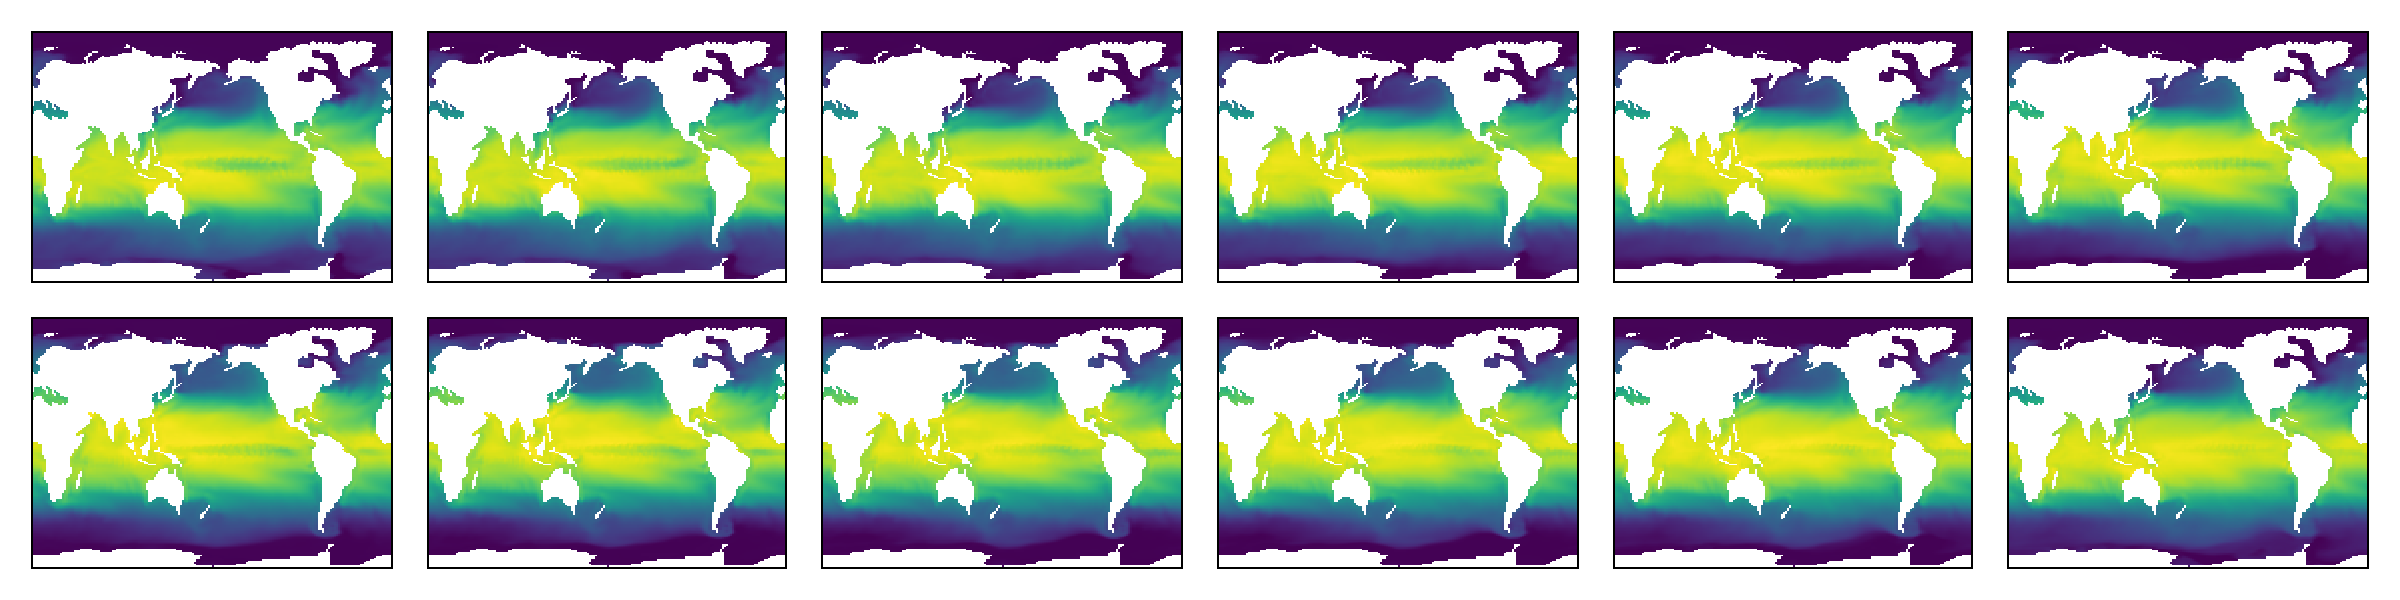

In [21]:
# or, if you to take a look at the first 12 slices, then doing the following get you there:
fig = Figure(; size = (1200, 300))
axs = [Axis(fig[i,j]) for i in 1:2 for j in 1:6]
[heatmap!(axs[i], c_small[Ti=i]) for i in 1:12]
hidedecorations!.(axs)
fig

In [22]:
# Now, from c_big
c_big

╭────────────────────────────────────╮
│ 384×192×251288 YAXArray{Float32,3} │
├────────────────────────────────────┴─────────────────────────────────── dims ┐
  ↓ lon Sampled{Float64} 0.0:0.9375:359.0625 ForwardOrdered Regular Points,
  → lat Sampled{Float64} [-89.28422753251364, -88.35700351866494, …, 88.35700351866494, 89.28422753251364] ForwardOrdered Irregular Points,
  ↗ Ti  Sampled{DateTime} [2015-01-01T03:00:00, …, 2101-01-01T00:00:00] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"         => "K"
  "history"       => "2019-07-21T06:26:13Z altered by CMOR: Treated scalar dime…
  "name"          => "tas"
  "cell_methods"  => "area: mean time: point"
  "cell_measures" => "area: areacella"
  "long_name"     => "Near-Surface Air Temperature"
  "coordinates"   => "height"
  "standard_name" => "air_temperature"
  "_FillValue"    => 1.0f20
  "comment"       => "near-surface (

In [23]:
using DimensionalData

In [24]:
c_window = c_big[Ti=Between(DateTime("2015-01-01"),DateTime("2015-01-02"))]

╭───────────────────────────────╮
│ 384×192×8 YAXArray{Float32,3} │
├───────────────────────────────┴──────────────────────────────────────── dims ┐
  ↓ lon Sampled{Float64} 0.0:0.9375:359.0625 ForwardOrdered Regular Points,
  → lat Sampled{Float64} [-89.28422753251364, -88.35700351866494, …, 88.35700351866494, 89.28422753251364] ForwardOrdered Irregular Points,
  ↗ Ti  Sampled{DateTime} [2015-01-01T03:00:00, …, 2015-01-02T00:00:00] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"         => "K"
  "history"       => "2019-07-21T06:26:13Z altered by CMOR: Treated scalar dime…
  "name"          => "tas"
  "cell_methods"  => "area: mean time: point"
  "cell_measures" => "area: areacella"
  "long_name"     => "Near-Surface Air Temperature"
  "coordinates"   => "height"
  "standard_name" => "air_temperature"
  "_FillValue"    => 1.0f20
  "comment"       => "near-surface (usually, 2

In [25]:
# download data
c_load = c_window.data[:,:,:];

### 3D Plotting

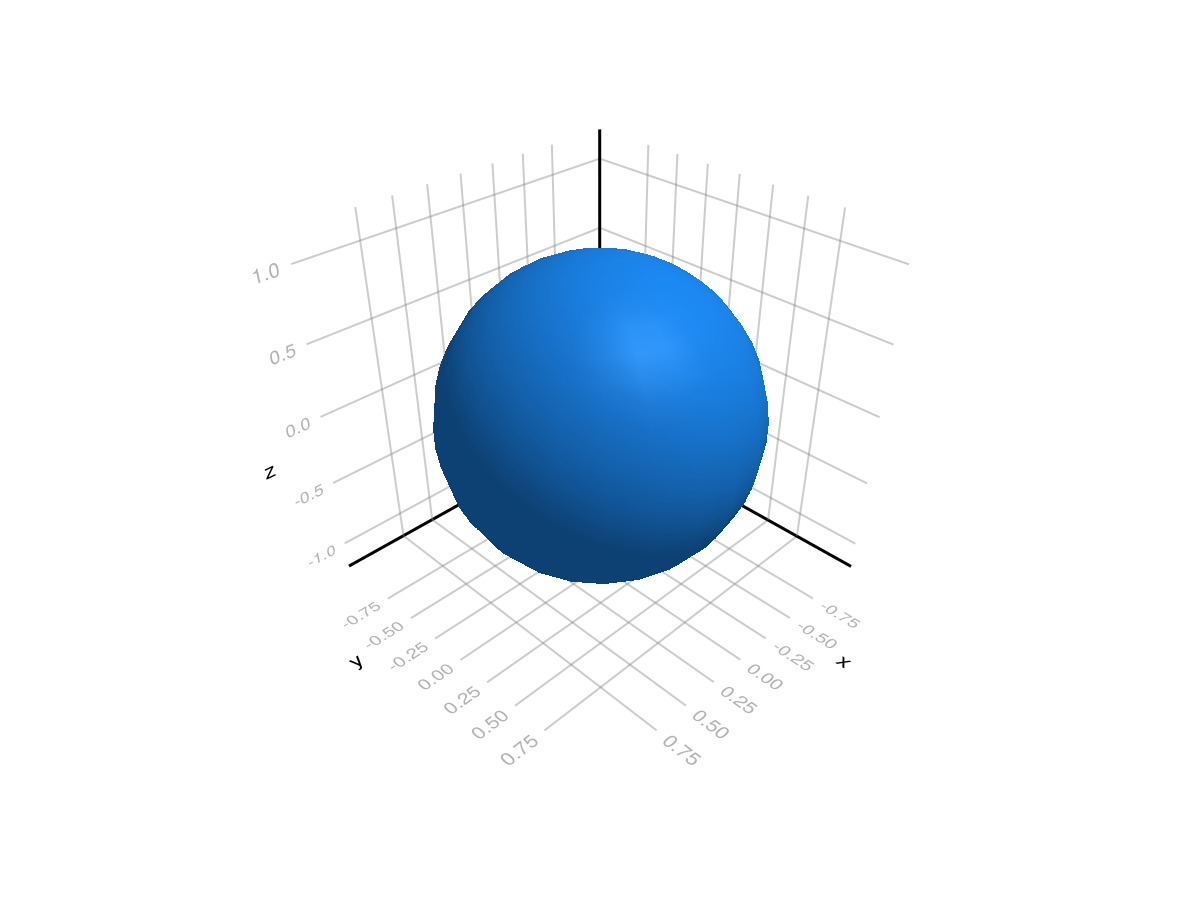

In [26]:
mesh(Sphere(Point3f(0),1); color = :dodgerblue)

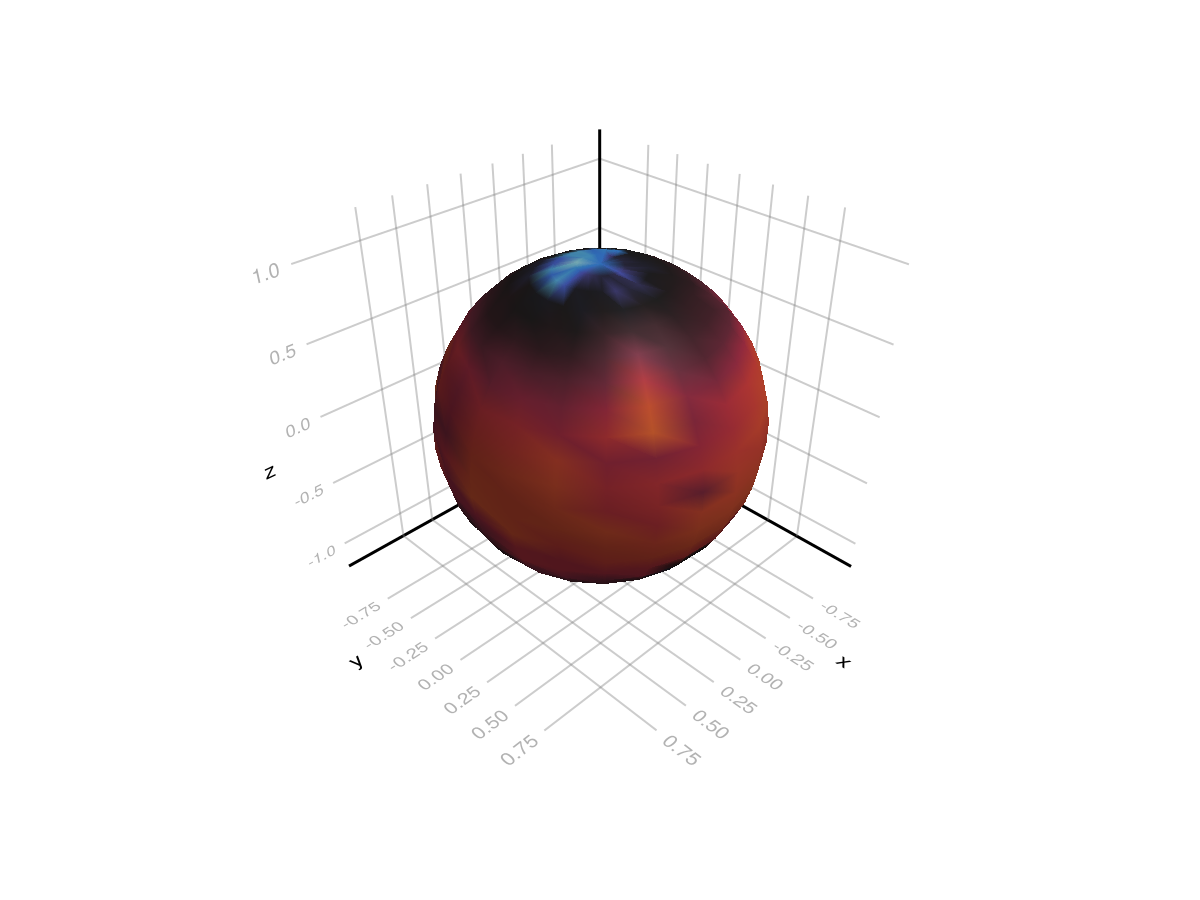

In [27]:
mesh(Sphere(Point3f(0),1); color = rotr90(c_load[:, :,1]),
    colormap = :seaborn_icefire_gradient)

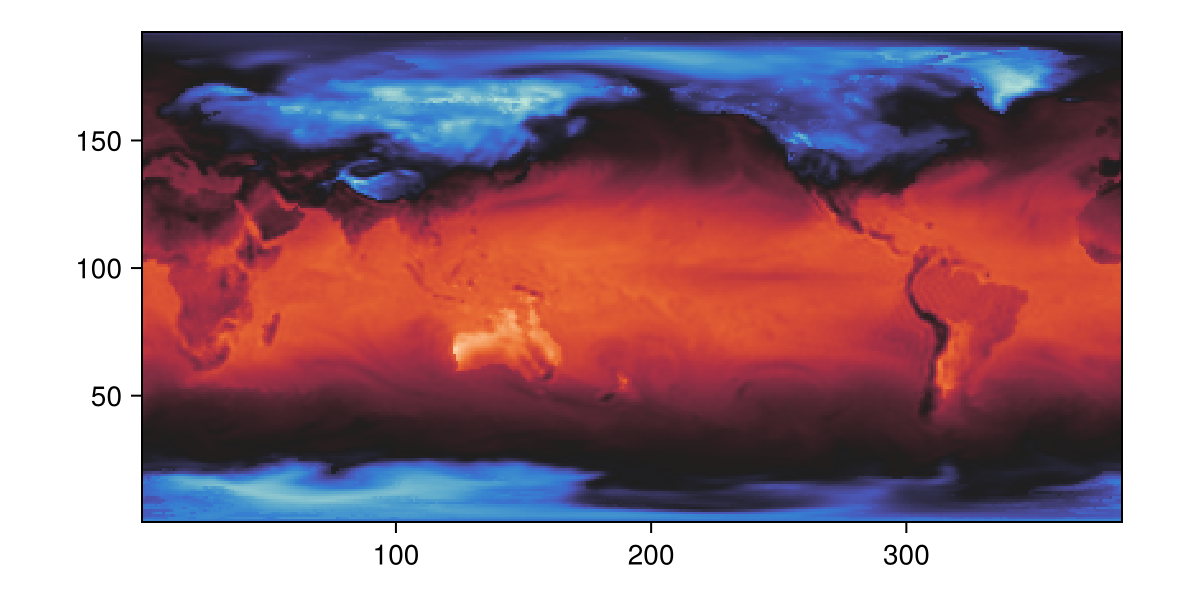

In [28]:
fig, ax, plt = heatmap(c_load[:, :,1]; colormap = :seaborn_icefire_gradient,
    axis = (; aspect=DataAspect()),
    figure = (; size = (600,300)))
fig

Questions?

Projections are also available via GeoMakie

In [29]:
Pkg.add("GeoMakie")

   Resolving package versions...
  No Changes to `~/Desktop/Julia-intro-for-geoscience-EGU2024/Project.toml`
  No Changes to `~/Desktop/Julia-intro-for-geoscience-EGU2024/Manifest.toml`


In [31]:
using GeoMakie

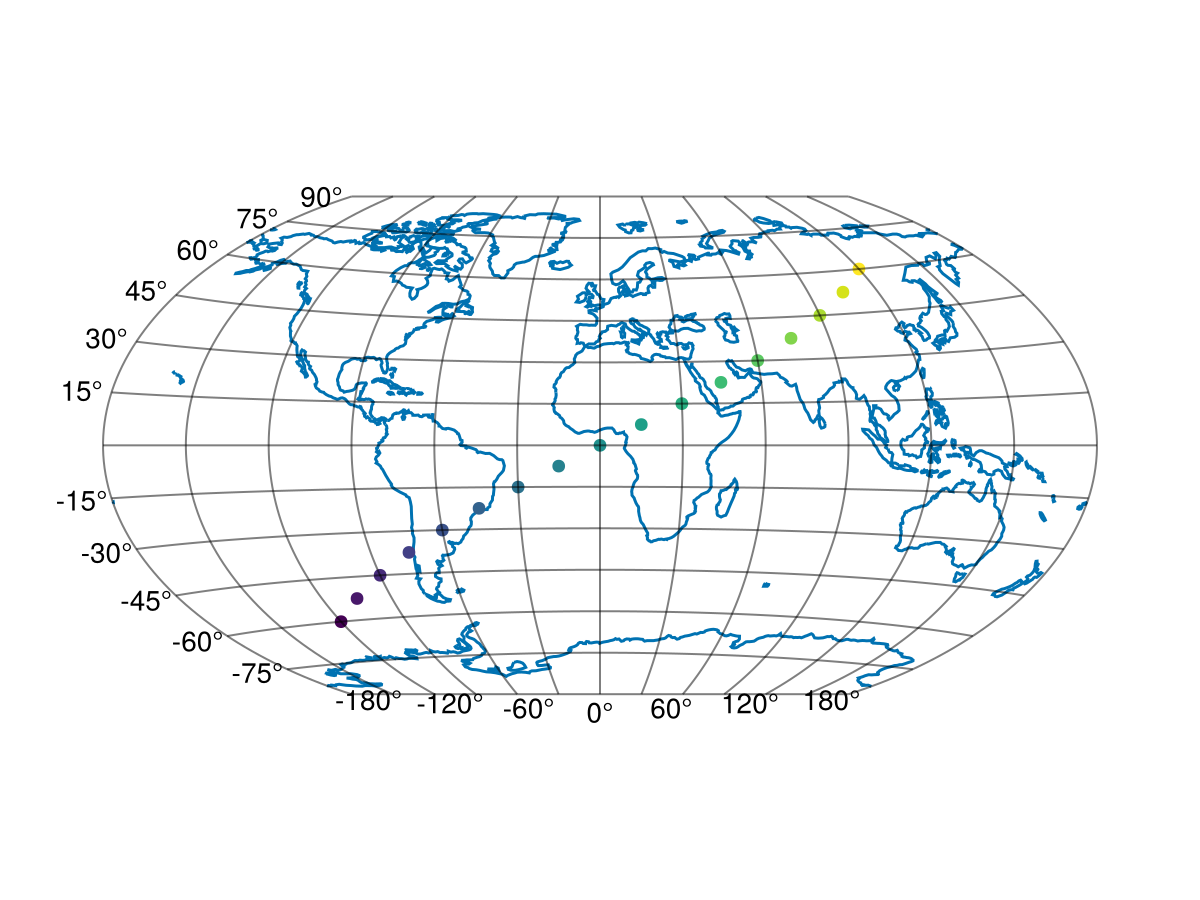

In [32]:
fig = Figure()
ga = GeoAxis(
    fig[1, 1]; # any cell of the figure's layout
    dest = "+proj=wintri", # the CRS in which you want to plot
)
lines!(ga, GeoMakie.coastlines()) # plot coastlines from Natural Earth as a reference
# You can plot your data the same way you would in Makie
scatter!(ga, -120:15:120, -60:7.5:60; color = -60:7.5:60, strokecolor = (:black, 0.2))
fig

and basemaps via [Tyler.jl](https://makieorg.github.io/Tyler.jl/dev/getting_started#Figure-size-and-aspect-ratio)

![](https://makieorg.github.io/Tyler.jl/dev/assets/londonFigure.DRPY-Rtv.png)